# Laramie Data import

- Case Data
- Testing Data
- Vaccine Data
- Wastewater Data
- Water volume data




In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

waste_source_data = pd.read_csv("./Data/Wastewater_test_log.csv")
print(waste_source_data.head())
case_source_data = pd.read_csv("./Data/covid_confirmed_usafacts.csv")
print(case_source_data.head())


   WPHL ID#  Run               Site     City    Lat     Lon  Historical GPD  \
0  20038308  1.0     Cody - Primary     Cody  44.53 -109.07            67.0   
1  20038308  2.0     Cody - Primary     Cody  44.53 -109.07            67.0   
2  20038308  3.0     Cody - Primary     Cody  44.53 -109.07            67.0   
3  20039196  1.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   
4  20039196  2.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   

   AvgInStreamHrs PackageOK  WastewaterTempF  ...    SampleProcessed  \
0             3.5       Yes             66.2  ...  7/7/2020 10:00:00   
1             3.5       Yes             66.2  ...  7/7/2020 10:00:00   
2             3.5       Yes             66.2  ...  7/7/2020 10:00:00   
3             3.5       Yes             58.3  ...  7/8/2020 13:00:00   
4             3.5       Yes             58.3  ...  7/8/2020 13:00:00   

      SiteDescription     N1     N2  N1Est_copies_ml  N2Est_copies_ml  \
0  Influent Headwor

# Data Tidy

## Case Data

In [15]:
laramie_case_data=case_source_data.loc[case_source_data["countyFIPS"]==56021,:]
# import data
case_data = laramie_case_data.T.iloc[4:, ]
# Accumulated cases
case_data["confirmed"] = laramie_case_data.T.iloc[4:, ]
case_data.drop(3180, axis=1, inplace=True)

# Deal with Unnormal Data
#print(case_data.loc["2020-08-09":"2020-08-12",:])
#print(case_data.loc["2020-10-23":"2020-10-26",:])
case_data.loc["2020-08-10", "confirmed"] = 503
case_data.loc["2020-08-11", "confirmed"] = 503
case_data.loc["2020-10-24", "confirmed"] = 1327
case_data.loc["2020-10-25", "confirmed"] = 1335
# Newly confirmed cases
Midvalue = np.zeros(len(case_data.index))
Midvalue[1:] = case_data['confirmed'].values[:-1]
case_data['newlyconfirmed'] = case_data['confirmed'].values - Midvalue
case_data["date"] = pd.to_datetime(case_data.index)
Unnormal_data = case_data[case_data.newlyconfirmed==0].index.tolist()
print(case_data.head())
print(Unnormal_data)

# Save Data

case_data.to_csv("./Data/laramie_tidy_data.csv")

           confirmed newlyconfirmed       date
2020-01-22         0            0.0 2020-01-22
2020-01-23         0            0.0 2020-01-23
2020-01-24         0            0.0 2020-01-24
2020-01-25         0            0.0 2020-01-25
2020-01-26         0            0.0 2020-01-26
['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12', '20

Case Data visualization



--------------Case Data-------------


<Figure size 640x480 with 0 Axes>

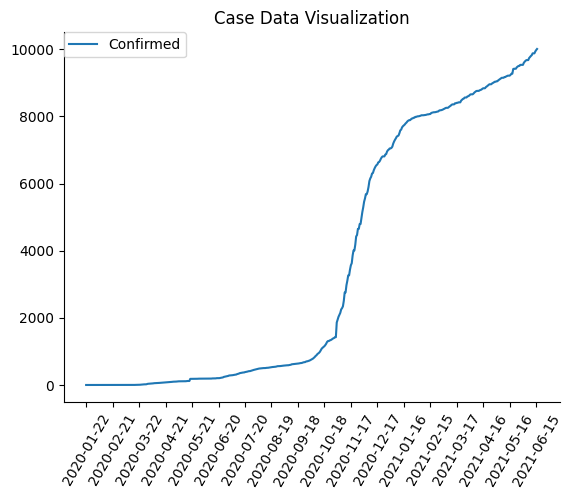

--------------Case Data-------------


<Figure size 640x480 with 0 Axes>

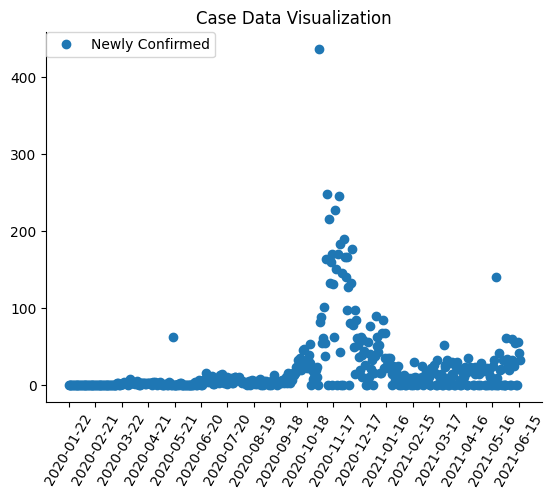

In [16]:
# Case Data Visualization
plt.figure("Case Data")
print("--------------Case Data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(case_data.index, case_data.loc[:, 'confirmed'], label='Confirmed')
# plt.fill_between(DATE, NowCityDown95.loc[A,'Wuhan_H'].values, NowCityUp95.loc[A,'Wuhan_H']
#                  , facecolor='green', alpha=0.05)
plt.xticks(rotation=60)
#x_major_locator=MultipleLocator(10)#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(10)#把y轴的刻度间隔设置为10，并存在变量里
ax = plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(30))  # 解决刻度过密
plt.legend(loc='upper left', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Case Data Visualization')
plt.show()
plt.savefig('./Fig/laramie_case_data.png', dpi=100, bbox_inches='tight')

plt.figure("Daily Case Data")
print("--------------Case Data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(case_data.index, case_data.loc[:, 'newlyconfirmed'], "o", label='Newly Confirmed')
plt.xticks(rotation=60)
#x_major_locator=MultipleLocator(10)#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(10)#把y轴的刻度间隔设置为10，并存在变量里
ax = plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(30))  # 解决刻度过密
plt.legend(loc='upper left', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Case Data Visualization')
plt.show()
plt.savefig('./Fig/laramie_daily_case_data.png', dpi=100, bbox_inches='tight')

--------------Case Data-------------


<Figure size 640x480 with 0 Axes>

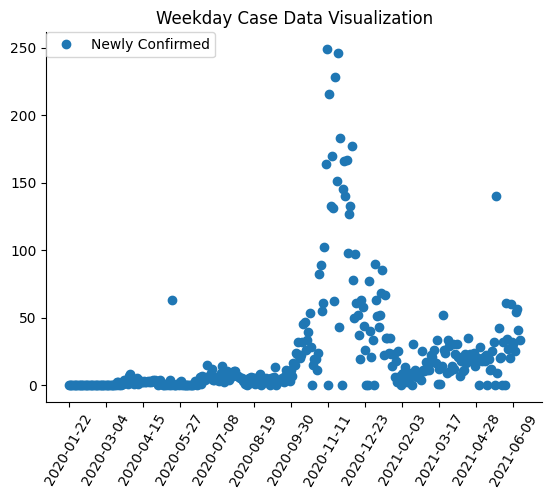

In [17]:
idx=pd.Series(case_data["date"]).dt
case_data_week=case_data[idx.dayofweek.isin([0,1,2,3,4]).values]
plt.figure("Daily Case Data")
print("--------------Case Data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(case_data_week.index, case_data_week.loc[:, 'newlyconfirmed'], "o", label='Newly Confirmed')
plt.xticks(rotation=60)
#x_major_locator=MultipleLocator(10)#把x轴的刻度间隔设置为1，并存在变量里
#y_major_locator=MultipleLocator(10)#把y轴的刻度间隔设置为10，并存在变量里
ax = plt.gca()  #ax为两条坐标轴的实例
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(30))  # 解决刻度过密
plt.legend(loc='upper left', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Weekday Case Data Visualization')
plt.show()
plt.savefig('./Fig/laramie_daily_case_data_weekday.png', dpi=100, bbox_inches='tight')



## Wastewater Data



In [18]:
laramie_waste_data = waste_source_data[waste_source_data["City"] == "Laramie"]
laramie_waste_data["date"] = pd.to_datetime(laramie_waste_data["SampleCollected"])
laramie_waste_data_run1 = laramie_waste_data[laramie_waste_data["Run"] == 1]
laramie_waste_data_run2 = laramie_waste_data[laramie_waste_data["Run"] == 2]
laramie_waste_data_run3 = laramie_waste_data[laramie_waste_data["Run"] == 3]
laramie_case_data = case_source_data[case_source_data["countyFIPS"] == 56021]

print(laramie_waste_data_run3.head())



    WPHL ID#  Run               Site     City    Lat     Lon  Historical GPD  \
5   20039196  3.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   
14  20040453  3.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   
23  20042604  3.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   
38  20044003  3.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   
47  20047194  3.0  Laramie - Primary  Laramie  41.31 -105.59            93.0   

    AvgInStreamHrs PackageOK  WastewaterTempF  ...   SiteDescription      N1  \
5              3.5       Yes             58.3  ...  Influent channel  40.000   
14             3.5       Yes             58.8  ...  Influent channel  35.684   
23             3.5       Yes             58.5  ...  Influent channel  40.000   
38             3.5       Yes             59.2  ...  Influent channel  40.000   
47             3.5       Yes             59.9  ...  Influent channel  40.000   

      N2 N1Est_copies_ml  N2Est_copies

<ipython-input-18-6e9a6cf98031>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laramie_waste_data["date"] = pd.to_datetime(laramie_waste_data["SampleCollected"])


# Wastewater Data Visualization

## Wasterwater Data

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

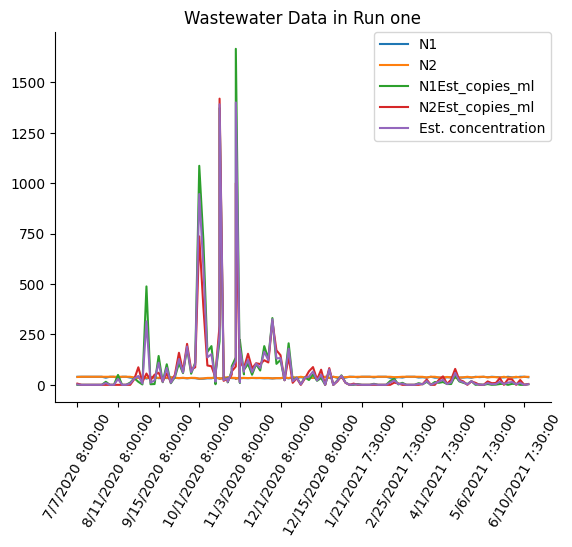

In [19]:
plt.figure("Wastewater data run1")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N1'],
         label='N1')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N2'],
         label='N2')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N2Est_copies_ml'],
         label='N2Est_copies_ml')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'Est. concentration'],
         label='Est. concentration')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))  # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Wastewater Data in Run one')
plt.show()
plt.savefig('./Fig/wastewater_data_run1.png', dpi=100, bbox_inches='tight')

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

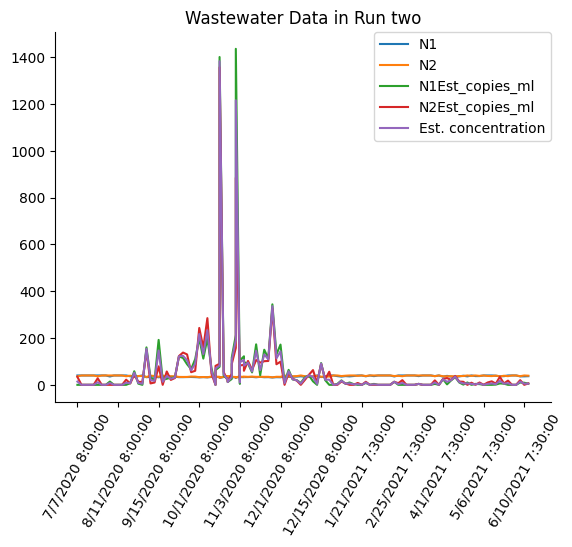

In [20]:
plt.figure("Wastewater data run2")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N1'],
         label='N1')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N2'],
         label='N2')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N2Est_copies_ml'],
         label='N2Est_copies_ml')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'Est. concentration'],
         label='Est. concentration')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))  # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Wastewater Data in Run two')
plt.show()
plt.savefig('./Fig/wastewater_data_run2.png', dpi=100, bbox_inches='tight')

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

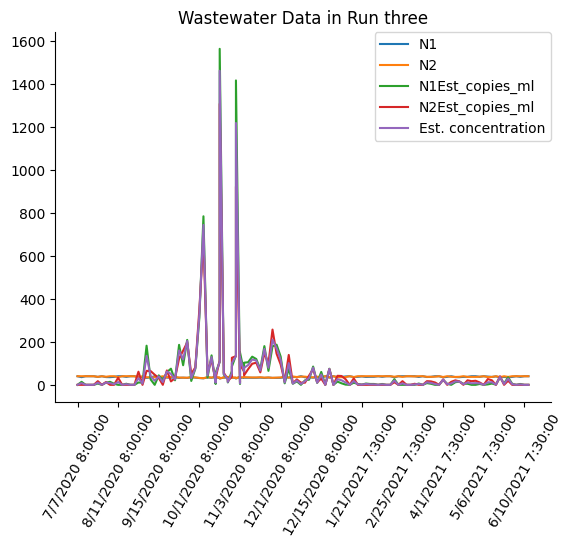

In [21]:
plt.figure("Wastewater data run3")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N1'],
         label='N1')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N2'],
         label='N2')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N2Est_copies_ml'],
         label='N2Est_copies_ml')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'Est. concentration'],
         label='Est. concentration')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))  # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Wastewater Data in Run three')
plt.show()
plt.savefig('./Fig/wastewater_data_run3.png', dpi=100, bbox_inches='tight')

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

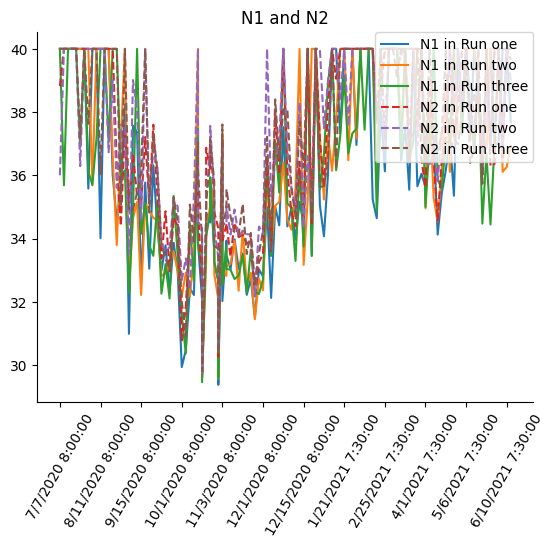

In [22]:
plt.figure("Wastewater data N1 N2")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N1'],
         label='N1 in Run one')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N1'],
         label='N1 in Run two')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N1'],
         label='N1 in Run three')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N2'], "--",
         label='N2 in Run one')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N2'], "--",
         label='N2 in Run two')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N2'], "--",
         label='N2 in Run three')

plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))
#ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(10)) # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('N1 and N2')
plt.show()
plt.savefig('./Fig/wastewater_data_N1_N2.png', dpi=100, bbox_inches='tight')


--------------Water data-------------


<Figure size 640x480 with 0 Axes>

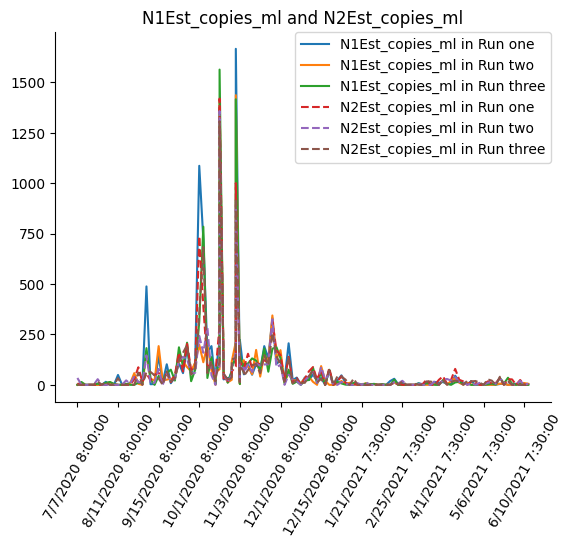

In [23]:
plt.figure("Wastewater data N1Est_copies_ml and N2Est_copies_ml")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml in Run one')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml in Run two')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N1Est_copies_ml'],
         label='N1Est_copies_ml in Run three')
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'N2Est_copies_ml'], "--",
         label='N2Est_copies_ml in Run one')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'N2Est_copies_ml'], "--",
         label='N2Est_copies_ml in Run two')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'N2Est_copies_ml'], "--",
         label='N2Est_copies_ml in Run three')

plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))
#ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(10)) # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('N1Est_copies_ml and N2Est_copies_ml')
plt.show()
plt.savefig('./Fig/wastewater_data_N1_N2Est_copies_ml.png', dpi=100, bbox_inches='tight')

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

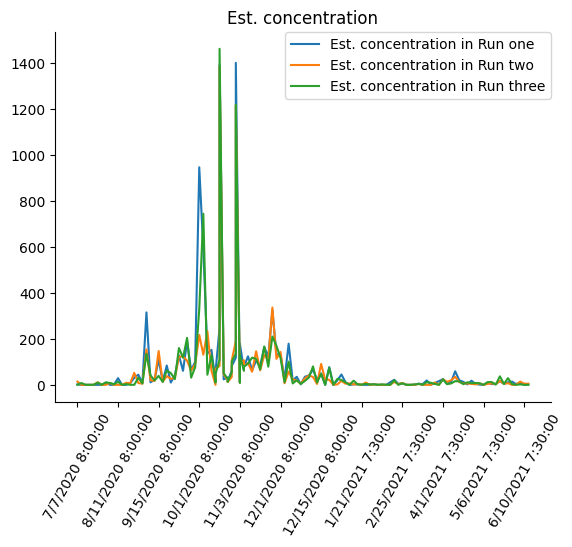

In [24]:
plt.figure("Wastewater data Est. concentration")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"],
         laramie_waste_data_run1.loc[:, 'Est. concentration'],
         label='Est. concentration in Run one')
plt.plot(laramie_waste_data_run2.loc[:, "SampleCollected"],
         laramie_waste_data_run2.loc[:, 'Est. concentration'],
         label='Est. concentration in Run two')
plt.plot(laramie_waste_data_run3.loc[:, "SampleCollected"],
         laramie_waste_data_run3.loc[:, 'Est. concentration'],
         label='Est. concentration in Run three')

plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))
#ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(10)) # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Est. concentration')
plt.show()
plt.savefig('./Fig/wastewater_data_Est. concentration.png', dpi=100, bbox_inches='tight')

--------------Water data-------------


<Figure size 640x480 with 0 Axes>

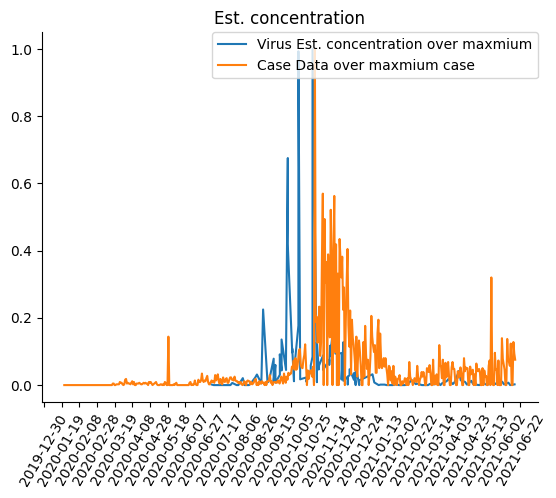

In [25]:
plt.figure("Wastewater data Est. concentration VS Case Data")
print("--------------Water data-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1["date"],
         laramie_waste_data_run1.loc[:, 'Est. concentration']/max(laramie_waste_data_run1.loc[:, 'Est. concentration']),
         label='Virus Est. concentration over maxmium')
plt.plot(case_data["date"],
         case_data.loc[:, 'newlyconfirmed']/max(case_data.loc[:, 'newlyconfirmed']),
         label='Case Data over maxmium case ')

plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(20))
#ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(10)) # 解决刻度过密
plt.legend(loc='upper right', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Est. concentration')
plt.show()
plt.savefig('./Fig/wastewater_data_VS_case_data.png', dpi=100, bbox_inches='tight')



## Water Temperature

--------------Water temperature-------------


<Figure size 640x480 with 0 Axes>

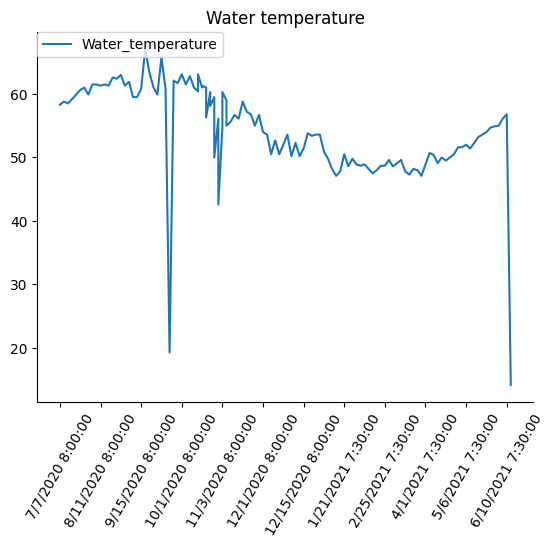

In [26]:
plt.figure("Temperature")
print("--------------Water temperature-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"], laramie_waste_data_run1.loc[:, 'WastewaterTempF'],
         label='Water_temperature')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))  # 解决刻度过密
plt.legend(loc='upper left', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Water temperature')
plt.show()
plt.savefig('./Fig/water_temperature.png', dpi=100, bbox_inches='tight')

## Water Volume

--------------Water Volume-------------


<Figure size 640x480 with 0 Axes>

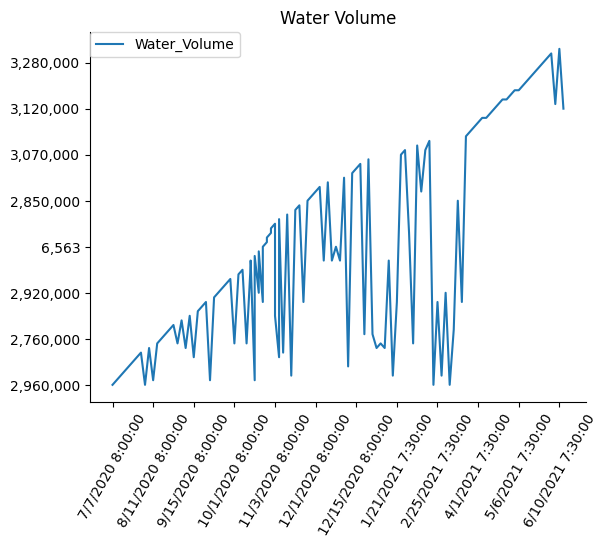

In [27]:
plt.figure("Water Volume")
print("--------------Water Volume-------------")
# plt.rcParams['font.sans-serif']=['SimHei'] # chinese support
plt.plot(laramie_waste_data_run1.loc[:, "SampleCollected"], laramie_waste_data_run1.loc[:, 'DailyTotalGallons'],
         label='Water_Volume')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mp.ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mp.ticker.MultipleLocator(10))  # 解决刻度过密
plt.legend(loc='upper left', borderaxespad=0.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Water Volume')
plt.show()
plt.savefig('./Fig/water_volume.png', dpi=100, bbox_inches='tight')
